<a href="https://colab.research.google.com/github/dawoodwasif/Customer-Audio-Analytics-of-Accent-and-Sentiment/blob/main/2_H2O_AutoML_for_UBL_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoML using H2O

Install Java Runtime Environment

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
openjdk version "11.0.14" 2022-01-18
OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
!pip install h2o

     |████████████████████████████████| 176.2 MB 1.4 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.4-py2.py3-none-any.whl size=176245474 sha256=422354b6b65c7a30ed3094f0610a851951b97b8661ff1fe079cf18b447da2a6a
  Stored in directory: /root/.cache/pip/wheels/66/7c/3b/6558f625a9415a96f7f650d33f1def07b6e30b0c871e8407a1
Successfully built h2o


In [ ]:
import h2o

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [ ]:
scaler = StandardScaler()

In [ ]:
df = pd.read_csv('inlyingfeatures.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6349 entries, 0 to 6348
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mel77       6349 non-null   float64
 1   mel80       6349 non-null   float64
 2   mel65       6349 non-null   float64
 3   mel72       6349 non-null   float64
 4   mel63       6349 non-null   float64
 5   mel52       6349 non-null   float64
 6   mel87       6349 non-null   float64
 7   mel76       6349 non-null   float64
 8   birthplace  6334 non-null   object 
dtypes: float64(8), object(1)
memory usage: 446.5+ KB


In [ ]:
#df.drop('accent', axis=1, inplace=True)

In [ ]:
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [ ]:
remove = df[df.birthplace.isna()].index
df.drop(remove, inplace=True)

In [ ]:
df.head()

,mel77,mel80,mel65,mel72,mel63,mel52,mel87,mel76,birthplace
0,0.192725,-0.312578,-0.169270,-0.156017,1.220976,-0.225969,-0.204675,-0.152925,usa
1,0.207035,-0.301820,-0.165438,-0.151954,1.230916,-0.219419,-0.196456,-0.147874,usa
2,-0.349635,-0.346773,-0.065056,-0.151200,-0.239531,-0.236956,-0.211168,-0.137679,usa
3,-0.226635,-0.118856,-0.155526,-0.135783,-0.230188,0.237621,0.158735,-0.175011,china
4,-0.226770,-0.118625,-0.155406,-0.135627,-0.230201,0.238693,0.159130,-0.174867,china


In [ ]:
required_countries = ['australia',
 'canada',
 'ghana',
 'hong kong',
 'india',
 'ireland',
 'kenya',
 'new zealand',
 'nigeria',
 'pakistan',
 'philippines',
 'singapore',
 'south africa',
 'tanzania',
 'uk',
 'usa']
df.birthplace[~df.birthplace.isin(required_countries)] = 'other'
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mel77,mel80,mel65,mel72,mel63,mel52,mel87,mel76,birthplace
0,0.192725,-0.312578,-0.169270,-0.156017,1.220976,-0.225969,-0.204675,-0.152925,usa
1,0.207035,-0.301820,-0.165438,-0.151954,1.230916,-0.219419,-0.196456,-0.147874,usa
2,-0.349635,-0.346773,-0.065056,-0.151200,-0.239531,-0.236956,-0.211168,-0.137679,usa
3,-0.226635,-0.118856,-0.155526,-0.135783,-0.230188,0.237621,0.158735,-0.175011,other
4,-0.226770,-0.118625,-0.155406,-0.135627,-0.230201,0.238693,0.159130,-0.174867,other


In [ ]:
df.to_csv('audiofp.csv', index=None)

Initialize H2O Instance

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 43 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.4
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_ajxlgh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.084 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
audio_df = h2o.import_file('audiofp.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
audio_train, audio_test, audio_valid = audio_df.split_frame(ratios=[.7, .15])

In [ ]:
audio_train

mel77,mel80,mel65,mel72,mel63,mel52,mel87,mel76,birthplace
0.192725,-0.312578,-0.16927,-0.156017,1.22098,-0.225969,-0.204675,-0.152925,usa
0.207035,-0.30182,-0.165438,-0.151954,1.23092,-0.219419,-0.196456,-0.147874,usa
-0.22677,-0.118625,-0.155406,-0.135627,-0.230201,0.238693,0.15913,-0.174867,other
-0.344185,-0.340777,-0.171277,-0.156165,-0.247065,0.130018,0.117581,-0.177312,other
-0.222676,2.70213,-0.150017,-0.111026,-0.215054,0.153247,-0.147554,-0.15374,usa
-0.2196,2.6979,-0.149735,-0.11,-0.213849,0.154749,-0.146918,-0.15182,usa
-0.339971,-0.189537,-0.169576,-0.132115,-0.243364,0.517986,-0.209297,-0.179915,usa
-0.284884,-0.345119,0.137036,-0.117426,-0.243149,-0.114822,-0.210703,-0.172998,other
-0.350239,-0.348427,-0.174085,-0.158392,-0.0649751,-0.196527,-0.211149,-0.15679,other
0.14104,-0.0517198,-0.152529,0.142845,-0.0439024,0.0766114,-0.206461,-0.0637601,other


In [ ]:
y = "birthplace"
x = audio_df.columns
x.remove(y)

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=3,max_runtime_secs = 1800,
                balance_classes=True, sort_metric='AUCPR', export_checkpoints_dir='./ckpt')

In [ ]:
aml.train(x = x, y = y, training_frame = audio_train, validation_frame=audio_valid)

AutoML progress: |
07:48:42.376: Project: AutoML_2_20220401_74842
07:48:42.376: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
07:48:42.377: Setting stopping tolerance adaptively based on the training frame: 0.014978857285595261
07:48:42.377: Build control seed: 10
07:48:42.377: training frame: Frame key: AutoML_2_20220401_74842_training_py_10_sid_b71a    cols: 166    rows: 4457  chunks: 8    size: 5995163  checksum: 7148638017356849656
07:48:42.380: validation frame: Frame key: py_12_sid_b71a    cols: 166    rows: 1007  chunks: 8    size: 1437713  checksum: 4403955107664831710
07:48:42.380: leaderboard frame: NULL
07:48:42.380: blending frame: NULL
07:48:42.380: response column: birthplace
07:48:42.380: fold column: null
07:48:42.380: weights column: null
07:48:42.381: Loading 

In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head()

model_id,aucpr,mean_per_class_error,logloss,rmse,mse
GBM_1_AutoML_4_20220401_125304,nan,0.667243,2.80335,0.480041,0.230439
XGBoost_2_AutoML_4_20220401_125304,nan,0.87795,1.12496,0.542708,0.294532
XGBoost_1_AutoML_4_20220401_125304,nan,0.832687,1.25752,0.538537,0.290022
GBM_3_AutoML_4_20220401_125304,nan,0.928064,1.15057,0.562578,0.316494
StackedEnsemble_BestOfFamily_2_AutoML_4_20220401_125304,nan,0.9375,1.27262,0.600107,0.360129
StackedEnsemble_AllModels_1_AutoML_4_20220401_125304,nan,0.9375,1.27262,0.600107,0.360129
DRF_1_AutoML_4_20220401_125304,nan,0.855843,2.58831,0.520357,0.270771
GBM_2_AutoML_4_20220401_125304,nan,0.930861,1.15803,0.566668,0.321113
GBM_4_AutoML_4_20220401_125304,nan,0.924206,1.13167,0.553323,0.306166
GLM_1_AutoML_4_20220401_125304,nan,0.936441,1.26781,0.599194,0.359033


In [ ]:
audio_pred=aml.leader.predict(audio_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
audio_pred.head()

predict,australia,canada,ghana,india,ireland,kenya,new zealand,nigeria,other,pakistan,philippines,singapore,south africa,tanzania,uk,usa
other,1.1437e-09,1.59149e-08,1.06794e-13,7.42053e-08,2.48349e-12,4.49233e-15,3.03393e-14,1.38224e-10,0.893335,1.56288e-12,4.17138e-10,7.38249e-14,6.51083e-16,2.3657e-16,4.97906e-08,0.106665
usa,1.26116e-09,1.74198e-08,1.25949e-13,2.38862e-08,7.81814e-13,1.2049e-14,1.23971e-15,3.7672e-13,0.279886,2.16669e-12,2.88946e-12,5.68886e-14,8.45042e-15,1.29525e-14,1.35557e-06,0.720113
other,2.02942e-10,6.46204e-11,8.56873e-16,5.01426e-10,5.60784e-13,1.03492e-16,1.95152e-16,1.65453e-13,0.995778,7.20416e-14,2.97064e-13,5.03941e-16,3.09026e-16,1.24921e-16,3.61226e-09,0.00422239
usa,1.44478e-10,8.23604e-08,2.85557e-13,3.97318e-08,1.48839e-14,4.3362e-10,2.90958e-15,1.47223e-13,0.176652,4.51061e-10,1.93776e-11,3.0475e-16,1.12453e-15,1.28006e-15,3.36182e-05,0.823315
usa,7.0586e-09,1.74301e-08,6.77801e-15,7.74583e-06,4.28196e-13,1.73404e-15,5.80311e-13,1.47579e-14,0.0564063,5.63506e-13,7.44875e-14,1.49678e-16,1.33766e-15,1.49909e-15,4.38069e-09,0.943586
other,2.85406e-13,1.14954e-10,2.61743e-13,1.58058e-08,1.32843e-16,4.47163e-15,5.66527e-17,2.68203e-13,0.999956,3.44229e-12,7.58928e-15,6.38076e-18,1.87115e-17,2.35968e-17,6.89533e-08,4.41842e-05
other,6.37548e-12,6.07949e-11,3.23523e-15,1.20705e-08,2.55694e-14,5.14362e-16,6.29607e-17,1.06293e-12,0.996999,6.81048e-11,1.09689e-13,2.44444e-17,2.85029e-17,1.60411e-14,5.06005e-09,0.00300077
other,3.61525e-12,1.52972e-08,2.94845e-15,1.09631e-09,4.32931e-14,9.43778e-16,6.88262e-17,4.21059e-11,0.999485,1.66985e-11,5.915e-14,1.02983e-17,4.00972e-14,4.79001e-17,9.93072e-08,0.000514991
other,3.73182e-12,2.11355e-08,2.41957e-15,1.24418e-09,4.09251e-14,1.07107e-15,7.80119e-17,1.30348e-11,0.999298,1.89504e-11,5.77699e-14,1.16873e-17,4.55027e-14,5.43609e-17,5.99171e-08,0.000701596
uk,1.27421e-08,1.06956e-11,3.40376e-14,3.28379e-10,1.56267e-15,1.47253e-17,2.05228e-18,3.95891e-15,0.00282532,7.28704e-13,7.03543e-16,1.0366e-18,2.2709e-18,1.66188e-18,0.996957,0.000217731


In [ ]:
aml.leader.model_performance(audio_test)


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.2454528458483575
RMSE: 0.49543197903280073
LogLoss: 2.6550336738404274
Mean Per-Class Error: 0.6561740118801626
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,australia,canada,ghana,india,ireland,kenya,new zealand,nigeria,other,pakistan,philippines,singapore,south africa,tanzania,uk,usa,Error,Rate
0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,8 / 14
1,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.814815,22 / 27
2,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.727273,8 / 11
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.687500,11 / 16
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.857143,6 / 7
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.800000,4 / 5
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2 / 2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,5 / 9
8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,564.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.100478,63 / 627
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,6 / 10



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.725240
1,2,0.888179
2,3,0.925453
3,4,0.946752
4,5,0.954207
5,6,0.963791
6,7,0.968051
7,8,0.974441
8,9,0.978701
9,10,0.982961


In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [ ]:
model_ids

['GBM_1_AutoML_4_20220401_125304',
 'XGBoost_2_AutoML_4_20220401_125304',
 'XGBoost_1_AutoML_4_20220401_125304',
 'GBM_3_AutoML_4_20220401_125304',
 'StackedEnsemble_BestOfFamily_2_AutoML_4_20220401_125304',
 'StackedEnsemble_AllModels_1_AutoML_4_20220401_125304',
 'DRF_1_AutoML_4_20220401_125304',
 'GBM_2_AutoML_4_20220401_125304',
 'GBM_4_AutoML_4_20220401_125304',
 'GLM_1_AutoML_4_20220401_125304',
 'StackedEnsemble_BestOfFamily_1_AutoML_4_20220401_125304']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_4_20220401_125304


Model Summary: 


,,number_of_trees
0,,63.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.08325178925412716
RMSE: 0.2885338615381688
LogLoss: 0.30161745022824143
Mean Per-Class Error: 0.3913267870084108
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,australia,canada,ghana,india,ireland,kenya,new zealand,nigeria,other,pakistan,philippines,singapore,south africa,tanzania,uk,usa,Error,Rate
0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.205882,14 / 68
1,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159292,18 / 113
2,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.451613,14 / 31
3,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.206612,25 / 121
4,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.482759,14 / 29
5,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.384615,10 / 26
6,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.631579,12 / 19
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476190,20 / 42
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2876.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"0 / 2,876"
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386364,17 / 44



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.945751
1,2,0.981465
2,3,0.991185
3,4,0.995479
4,5,0.997966
5,6,0.998644
6,7,0.998644
7,8,0.999548
8,9,0.999548
9,10,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.2969074504460355
RMSE: 0.5448921457004455
LogLoss: 1.1526661591859166
Mean Per-Class Error: 0.8983881813028417
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,australia,canada,ghana,india,ireland,kenya,new zealand,nigeria,other,pakistan,philippines,singapore,south africa,tanzania,uk,usa,Error,Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.000000,15 / 15
1,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.800000,16 / 20
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,12 / 12
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.935484,29 / 31
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3 / 3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2 / 2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3 / 3
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.000000,13 / 13
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.049128,31 / 631
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,7 / 7



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.681771
1,2,0.840371
2,3,0.900103
3,4,0.921730
4,5,0.938208
5,6,0.946447
6,7,0.952626
7,8,0.962925
8,9,0.969104
9,10,0.974253



ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.29453240601071695
RMSE: 0.5427083986918914
LogLoss: 1.1249636255912312
Mean Per-Class Error: 0.8779499462267986
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,australia,canada,ghana,india,ireland,kenya,new zealand,nigeria,other,pakistan,philippines,singapore,south africa,tanzania,uk,usa,Error,Rate
0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.838235,57 / 68
1,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.840708,95 / 113
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.967742,30 / 31
3,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.917355,111 / 121
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.965517,28 / 29
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.000000,26 / 26
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.000000,19 / 19
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.976190,41 / 42
8,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,2721.0,0.0,0.0,0.0,0.0,0.0,6.0,141.0,0.053894,"155 / 2,876"
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.977273,43 / 44



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.689873
1,2,0.853752
2,3,0.900090
3,4,0.922920
4,5,0.935353
5,6,0.944846
6,7,0.954340
7,8,0.962929
8,9,0.968128
9,10,0.974005



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.689877,0.014775,0.682034,0.680678,0.706920
1,auc,NaN,0.000000,NaN,NaN,NaN
2,err,0.310123,0.014775,0.317966,0.319322,0.293080
3,err_count,457.333340,21.962088,469.000000,471.000000,432.000000
4,logloss,1.124953,0.040237,1.145651,1.150628,1.078581
5,max_per_class_error,1.000000,0.000000,1.000000,1.000000,1.000000
6,mean_per_class_accuracy,0.123919,0.043812,0.091548,0.106436,0.173773
7,mean_per_class_error,0.876081,0.043812,0.908452,0.893564,0.826227
8,mse,0.294529,0.013226,0.301741,0.302582,0.279264
9,pr_auc,NaN,0.000000,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-04-01 13:21:13,14.891 sec,0.0,0.937500,2.772589,0.349910,NaN,NaN,0.937500,2.772589,0.350154,NaN,NaN
1,,2022-04-01 13:21:14,15.157 sec,5.0,0.650519,1.242919,0.331826,NaN,NaN,0.674969,1.382933,0.348095,NaN,NaN
2,,2022-04-01 13:21:14,15.417 sec,10.0,0.560314,0.976106,0.297016,NaN,NaN,0.613863,1.248238,0.340886,NaN,NaN
3,,2022-04-01 13:21:14,15.688 sec,15.0,0.509664,0.823498,0.261528,NaN,NaN,0.588657,1.201478,0.333677,NaN,NaN
4,,2022-04-01 13:21:14,15.967 sec,20.0,0.478386,0.729120,0.233047,NaN,NaN,0.579844,1.189533,0.331617,NaN,NaN
5,,2022-04-01 13:21:15,16.294 sec,25.0,0.447590,0.642496,0.197107,NaN,NaN,0.573014,1.178377,0.325438,NaN,NaN
6,,2022-04-01 13:21:15,16.604 sec,30.0,0.421520,0.574077,0.167722,NaN,NaN,0.568243,1.170043,0.324408,NaN,NaN
7,,2022-04-01 13:21:15,16.931 sec,35.0,0.394197,0.509550,0.142405,NaN,NaN,0.563418,1.169902,0.321318,NaN,NaN
8,,2022-04-01 13:21:16,17.305 sec,40.0,0.372488,0.460855,0.120027,NaN,NaN,0.558935,1.167088,0.314109,NaN,NaN
9,,2022-04-01 13:21:16,17.655 sec,45.0,0.351590,0.417332,0.101944,NaN,NaN,0.555575,1.163586,0.320288,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mel87,2177.573730,1.000000,0.134862
1,mel77,2119.393311,0.973282,0.131259
2,mel72,2055.136475,0.943774,0.127280
3,mel52,2007.879761,0.922072,0.124353
4,mel63,1989.054932,0.913427,0.123187
5,mel80,1948.406006,0.894760,0.120669
6,mel76,1945.449707,0.893402,0.120486
7,mel65,1903.747559,0.874252,0.117904


In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'multinomial',
  'default': 'AUT

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 10,
  'min_child_weight': 5.0,
  'nround': 63,
  'nthread': 2,
  'num_class': 16,
  'objective': 'multi:softprob',
  'seed': 14,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'exact'},
 63)

In [ ]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_4_20220401_125304


Model Summary: 


,,number_of_trees
0,,63.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.08325178925412716
RMSE: 0.2885338615381688
LogLoss: 0.30161745022824143
Mean Per-Class Error: 0.3913267870084108
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,australia,canada,ghana,india,ireland,kenya,new zealand,nigeria,other,pakistan,philippines,singapore,south africa,tanzania,uk,usa,Error,Rate
0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.205882,14 / 68
1,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159292,18 / 113
2,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.451613,14 / 31
3,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.206612,25 / 121
4,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.482759,14 / 29
5,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.384615,10 / 26
6,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.631579,12 / 19
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476190,20 / 42
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2876.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"0 / 2,876"
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386364,17 / 44



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.945751
1,2,0.981465
2,3,0.991185
3,4,0.995479
4,5,0.997966
5,6,0.998644
6,7,0.998644
7,8,0.999548
8,9,0.999548
9,10,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.2969074504460355
RMSE: 0.5448921457004455
LogLoss: 1.1526661591859166
Mean Per-Class Error: 0.8983881813028417
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,australia,canada,ghana,india,ireland,kenya,new zealand,nigeria,other,pakistan,philippines,singapore,south africa,tanzania,uk,usa,Error,Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.000000,15 / 15
1,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.800000,16 / 20
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,12 / 12
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.935484,29 / 31
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3 / 3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2 / 2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3 / 3
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.000000,13 / 13
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.049128,31 / 631
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,7 / 7



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.681771
1,2,0.840371
2,3,0.900103
3,4,0.921730
4,5,0.938208
5,6,0.946447
6,7,0.952626
7,8,0.962925
8,9,0.969104
9,10,0.974253



ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.29453240601071695
RMSE: 0.5427083986918914
LogLoss: 1.1249636255912312
Mean Per-Class Error: 0.8779499462267986
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,australia,canada,ghana,india,ireland,kenya,new zealand,nigeria,other,pakistan,philippines,singapore,south africa,tanzania,uk,usa,Error,Rate
0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.838235,57 / 68
1,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.840708,95 / 113
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.967742,30 / 31
3,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.917355,111 / 121
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.965517,28 / 29
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.000000,26 / 26
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.000000,19 / 19
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.976190,41 / 42
8,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,2721.0,0.0,0.0,0.0,0.0,0.0,6.0,141.0,0.053894,"155 / 2,876"
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.977273,43 / 44



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.689873
1,2,0.853752
2,3,0.900090
3,4,0.922920
4,5,0.935353
5,6,0.944846
6,7,0.954340
7,8,0.962929
8,9,0.968128
9,10,0.974005



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.689877,0.014775,0.682034,0.680678,0.706920
1,auc,NaN,0.000000,NaN,NaN,NaN
2,err,0.310123,0.014775,0.317966,0.319322,0.293080
3,err_count,457.333340,21.962088,469.000000,471.000000,432.000000
4,logloss,1.124953,0.040237,1.145651,1.150628,1.078581
5,max_per_class_error,1.000000,0.000000,1.000000,1.000000,1.000000
6,mean_per_class_accuracy,0.123919,0.043812,0.091548,0.106436,0.173773
7,mean_per_class_error,0.876081,0.043812,0.908452,0.893564,0.826227
8,mse,0.294529,0.013226,0.301741,0.302582,0.279264
9,pr_auc,NaN,0.000000,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-04-01 13:21:13,14.891 sec,0.0,0.937500,2.772589,0.349910,NaN,NaN,0.937500,2.772589,0.350154,NaN,NaN
1,,2022-04-01 13:21:14,15.157 sec,5.0,0.650519,1.242919,0.331826,NaN,NaN,0.674969,1.382933,0.348095,NaN,NaN
2,,2022-04-01 13:21:14,15.417 sec,10.0,0.560314,0.976106,0.297016,NaN,NaN,0.613863,1.248238,0.340886,NaN,NaN
3,,2022-04-01 13:21:14,15.688 sec,15.0,0.509664,0.823498,0.261528,NaN,NaN,0.588657,1.201478,0.333677,NaN,NaN
4,,2022-04-01 13:21:14,15.967 sec,20.0,0.478386,0.729120,0.233047,NaN,NaN,0.579844,1.189533,0.331617,NaN,NaN
5,,2022-04-01 13:21:15,16.294 sec,25.0,0.447590,0.642496,0.197107,NaN,NaN,0.573014,1.178377,0.325438,NaN,NaN
6,,2022-04-01 13:21:15,16.604 sec,30.0,0.421520,0.574077,0.167722,NaN,NaN,0.568243,1.170043,0.324408,NaN,NaN
7,,2022-04-01 13:21:15,16.931 sec,35.0,0.394197,0.509550,0.142405,NaN,NaN,0.563418,1.169902,0.321318,NaN,NaN
8,,2022-04-01 13:21:16,17.305 sec,40.0,0.372488,0.460855,0.120027,NaN,NaN,0.558935,1.167088,0.314109,NaN,NaN
9,,2022-04-01 13:21:16,17.655 sec,45.0,0.351590,0.417332,0.101944,NaN,NaN,0.555575,1.163586,0.320288,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mel87,2177.573730,1.000000,0.134862
1,mel77,2119.393311,0.973282,0.131259
2,mel72,2055.136475,0.943774,0.127280
3,mel52,2007.879761,0.922072,0.124353
4,mel63,1989.054932,0.913427,0.123187
5,mel80,1948.406006,0.894760,0.120669
6,mel76,1945.449707,0.893402,0.120486
7,mel65,1903.747559,0.874252,0.117904


In [82]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

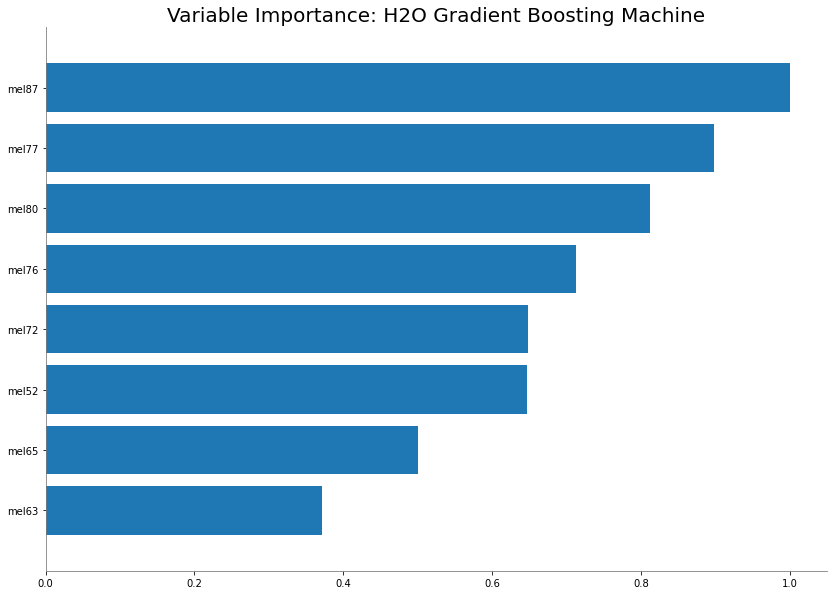

<Figure size 432x288 with 0 Axes>

In [83]:
out_gbm.varimp_plot()

In [ ]:
aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_4_20220401_125304.zip'

In [86]:
model_path = h2o.save_model(model=out_gbm, path="/content/mymodel", force=True)
print(model_path)

/content/mymodel/GBM_1_AutoML_4_20220401_125304
